# Analyse de données avec visualisation T-SNE et UMAP
Ce notebook implémente une analyse de données sur le jeu de données `Covertype`. Il inclut des techniques de réduction de dimension (T-SNE et UMAP) et une classification par forêt aléatoire.

In [1]:
pip install tensorflow umap-learn[parametric_umap]

In [2]:
# Importations nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from umap import ParametricUMAP
#import umap.parametric_umap
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres globaux pour les visualisations
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 100

C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Telechargement du dataset en utilisant la librairie 'ucimlrepo'

In [3]:
# Chargement du dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets

### Échantillonnage pour réduire la taille et la complexité

In [4]:
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

### Split du dataset en train et test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

### Fonction de visualisation avec T-SNE

In [6]:
def visualize_tsne(X, y, title):
    tsne = TSNE(n_components=2, random_state=42, perplexity=100, max_iter=1500, learning_rate=600)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=np.ravel(y), palette='tab10', marker='o', s=30, alpha=0.7, edgecolor='k')
    plt.title(f'T-SNE Visualization - {title}')
    plt.legend(title='Classes', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

T-SNE visualization on original dataset


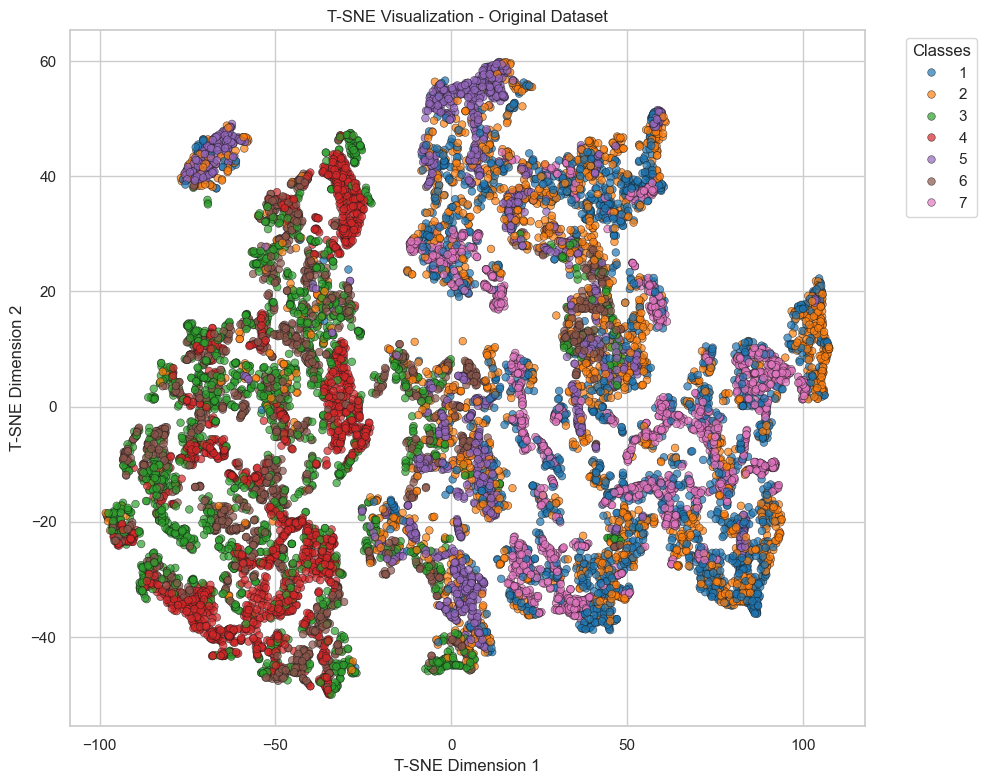

In [7]:
print('T-SNE visualization on original dataset')
visualize_tsne(X_train, y_train, 'Original Dataset')

### Observation :

Cette visualisation t-SNE montre une répartition des données en plusieurs zones correspondant aux différentes classes. Les points forment des groupes distincts, mais certains clusters montrent des mélanges ou des transitions, en particulier pour les classes proches comme 4, 5 et 6. On remarque aussi que certains groupes sont plus denses et compacts, tandis que d’autres sont plus dispersés, comme la classe 7.

### Fonction de visualisation avec UMAP

In [8]:
def visualize_umap(X, y, title):
    umap_model = ParametricUMAP()
    X_umap = umap_model.fit_transform(X)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=np.ravel(y), palette='tab10', marker='o')
    plt.title(f'UMAP Visualization - {title}')
    plt.show()

UMAP visualization on original dataset
Epoch 1/10


C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1605/1605 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2151
Epoch 2/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1781
Epoch 3/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1768
Epoch 4/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1763
Epoch 5/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1759
Epoch 6/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1757
Epoch 7/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1753
Epoch 8/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1753
Epoch 9/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1750
Epoch 10/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1749


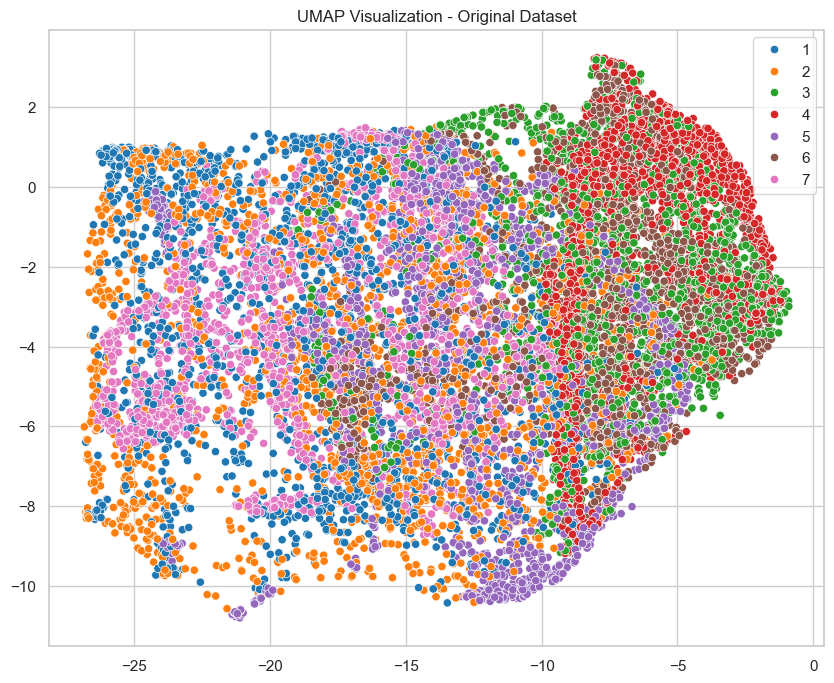

In [9]:
print('UMAP visualization on original dataset')
visualize_umap(X_train, y_train, 'Original Dataset')

### Observation :

Cette visualisation montre clairement des groupes distincts, ce qui veut dire que les données de chaque classe se ressemblent assez pour former des clusters. On peut aussi voir qu’il y a des endroits où les groupes se chevauchent un peu, comme entre les classes 4, 5 et 6, ce qui indique qu’il y a peut-être des ressemblances entre elles. Par contre, certaines classes, comme la 1 et la 7, sont bien séparées des autres, ce qui montre qu’elles ont des caractéristiques qui les différencient bien.

### Classification avec RandomForest

In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

C:\Users\soonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8634078696481192
F1 Score: 0.8618528564775945
